In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PERSONAL_FILE_PATH = '/content/drive/MyDrive/Umd/Activities/UMD Loop/Integration CV/Images/zed_depth_images/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
leftImg = cv.imread(PERSONAL_FILE_PATH + 'outputLeft.png', cv.IMREAD_GRAYSCALE)
rightImg = cv.imread(PERSONAL_FILE_PATH + 'outputRight.png', cv.IMREAD_GRAYSCALE)

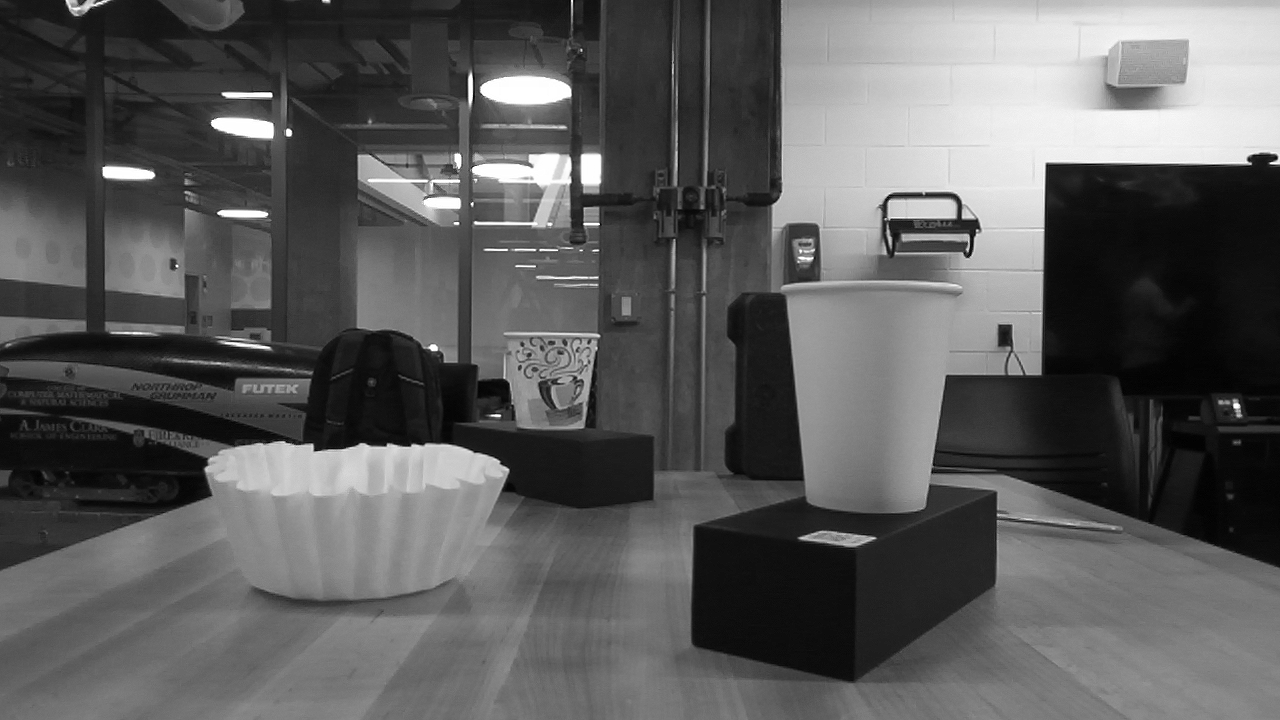

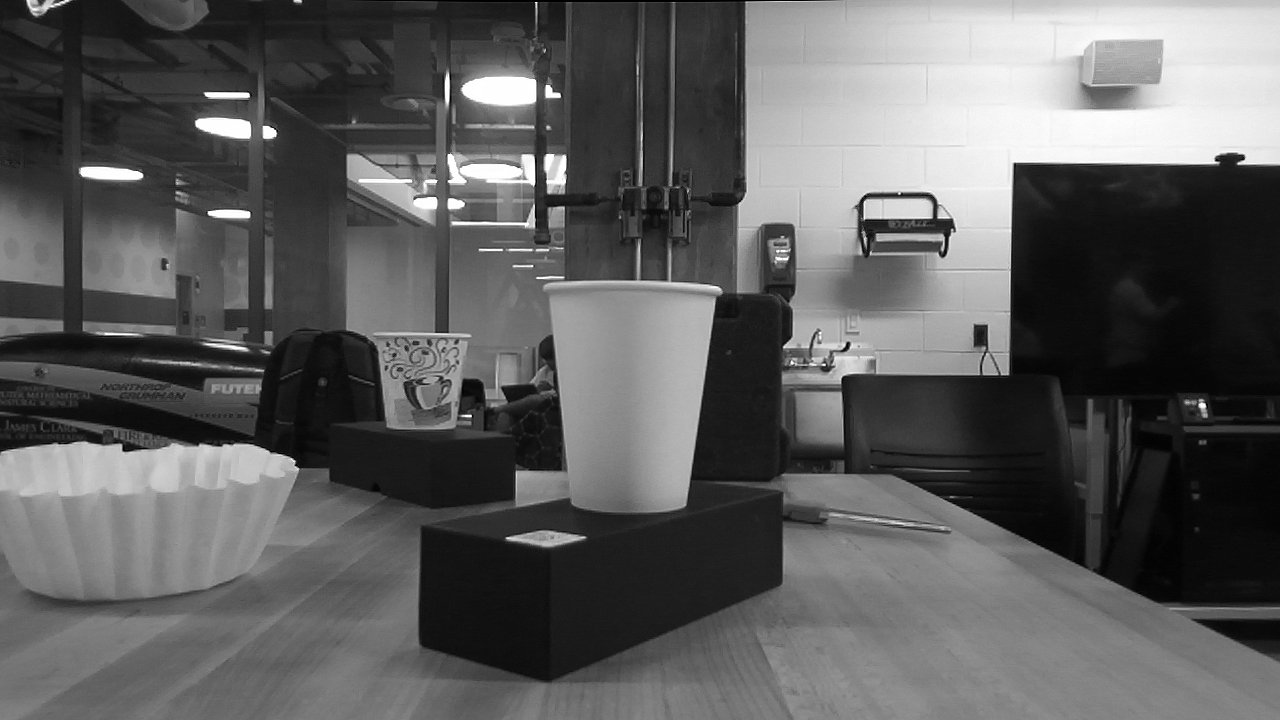

In [ ]:
cv2_imshow(leftImg)
cv2_imshow(rightImg)

In [ ]:
!pip install opencv-contrib-python==4.5.5.64

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.10.0.84
    Uninstalling opencv-contrib-python-4.10.0.84:
      Successfully uninstalled opencv-contrib-python-4.10.0.84


In [ ]:
for k in range (4):
  for bs in range(5, 9, 2):
    for ksize in [(3,3), (5,5), (7,7)]:
      for sigma in [0.5, 1.5, 2.5]:

        print(f"disparityFactor: {k} and blockSize: {bs}")
        print(f"kernalSize : {ksize} and sigma: {sigma}")
        stereo = cv.StereoBM_create(numDisparities=16*k, blockSize=bs)

        # Apply stereo block matching
        disparity = stereo.compute(leftImg, rightImg).astype(np.float32) / 16.0

        # Normalize the disparity map for visualization
        disparity = cv.normalize(disparity, None, 0, 255, cv.NORM_MINMAX).astype(np.uint8)

        # Apply WLS filtering to improve depth estimation (optional but useful)
        lmbda = 8000
        sigma = 1.5
        wls_filter = cv.ximgproc.createDisparityWLSFilter(stereo)
        disparity_filtered = wls_filter.filter(disparity, leftImg, None, rightImg)

        # Apply median filtering for noise reduction
        smooth = cv.GaussianBlur(disparity_filtered, ksize, sigma)

        # Bilateral Filtering Instead of Gaussian Blur
        # Gaussian blur applies uniform smoothing, which can cause
        # a loss of edge sharpness. Bilateral filtering is edge-preserving
        # and might be better for depth maps. It smooths the image while
        # maintaining the edges.
        # smooth = cv.bilateralFilter(disparity_filtered, d=9, sigmaColor=75, sigmaSpace=75)

        # Multi-Scale Gaussian Blur
        # Instead of using a single blur pass, you can try a multi-scale
        # approach by applying a small Gaussian blur first and then a
        # larger one. This can reduce noise while preserving key details.
        # smooth = cv.GaussianBlur(disparity_filtered, (3, 3), 0)
        # smooth = cv.GaussianBlur(smooth, (7, 7), 0)

        # Gaussian Pyramid for Multi-Resolution Blurring
        # Another approach is to use Gaussian pyramids, which perform
        # blurring across different scales. You can downsample the image
        # to reduce noise and then upsample it back to the original
        # resolution. This will reduce noise but might smooth out some
        # finer details.
        # downsampled = cv.pyrDown(disparity_filtered)
        # upsampled = cv.pyrUp(downsampled)
        # smooth = cv.GaussianBlur(upsampled, (5, 5), 0)


        # Sobel Edge Detection:
        # You can apply edge detection using the Sobel operator
        # to retain strong edges and reduce over-smoothing in those
        # areas. After Gaussian blurring, sharpen the edges based
        # on the Sobel gradient.
        # sobelx = cv.Sobel(disparity_filtered, cv.CV_64F, 1, 0, ksize=3)
        # sobely = cv.Sobel(disparity_filtered, cv.CV_64F, 0, 1, ksize=3)
        # sobel = cv.magnitude(sobelx, sobely)

        # # Combine Gaussian smoothing and edge sharpness
        # smooth = cv.GaussianBlur(disparity_filtered, (5, 5), 0)
        # smooth = cv.addWeighted(smooth, 0.7, sobel, 0.3, 0)


        fx = 951.581298828125
        baseline = 0.12

        disparity[disparity == 0] = 0.01
        depth = (fx * baseline) / disparity.astype(np.float32)

        # Plot the disparity and depth maps
        plt.imshow(smooth)
        plt.title(f'Smoothed Disparity (Block Size: {bs} Kernal: {ksize} Sigma: {sigma})')
        plt.show()

        plt.imshow(disparity)
        plt.title('Disparity Map')
        plt.show()

        plt.imshow(depth, cmap='inferno')
        plt.title('Depth Map')
        plt.show()

Output hidden; open in https://colab.research.google.com to view.